In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")



pd.set_option('max_columns', None)

### Importing the data 

In [2]:
data=pd.read_excel("Quotes_Per_Period.xlsx")

In [3]:
data.head()

,Created Date,Close Date,Customer Ship Date,Multiple,Lead Type,Sales Manager,Account Name,Opportunity Name,Process,Amount,Shipping Account,Invoice Total,Customer PO#,Facility,Facility Quote #,Total Project Cost,GP%,Opportunity Owner: Manager
0,2021-09-16 00:00:00,2022-01-01,NaT,0.0,Existing,Justin Howard,SACO,13952,Molding,188812.5,TBD,188812.5,LS-21-2348-GRD04,Hord Rapidtools,NaN,119647.5,36.63,NaN
1,2022-01-01 00:00:00,2022-01-01,NaT,0.0,Existing,Justin Howard,SACO,14228,MJF,0.0,249726109,0.0,NO CHARGE,FORECAST 3D,NaN,50.0,#Error!,NaN
2,2021-12-22 00:00:00,2022-01-01,NaT,0.0,Existing,Justin Howard,KCF Technologies,14215,Molding,25150.0,9E3461,25150.0,011924,Multiple,NaN,17330.0,31.09,NaN
3,2022-01-04 00:00:00,2022-01-04,NaT,0.0,Existing,Justin Howard,Andrew Barber,14232,CNC,2000.0,NaN,2000.0,NaN,NaN,NaN,1300.0,35,NaN
4,2021-12-20 00:00:00,2022-01-04,2022-01-26,0.0,Existing,Justin Howard,CNH Industrial America LLC,14199,CNC,3000.0,PF,3000.0,0G35620241,BOFONG RAPID LIlVIITED,14199,2100.0,30,NaN


### Drop the rows where all values are null

### Checking the shape , column names, column information

In [4]:
data.shape

(903, 18)

In [5]:
data.columns

Index(['Created Date', 'Close Date', 'Customer Ship Date', 'Multiple',
       'Lead Type', 'Sales Manager', 'Account Name', 'Opportunity Name',
       'Process', 'Amount', 'Shipping Account', 'Invoice Total',
       'Customer PO#', 'Facility', 'Facility Quote #', 'Total Project Cost',
       'GP%', 'Opportunity Owner: Manager'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Created Date                902 non-null    object        
 1   Close Date                  897 non-null    datetime64[ns]
 2   Customer Ship Date          283 non-null    datetime64[ns]
 3   Multiple                    897 non-null    float64       
 4   Lead Type                   888 non-null    object        
 5   Sales Manager               897 non-null    object        
 6   Account Name                897 non-null    object        
 7   Opportunity Name            897 non-null    object        
 8   Process                     896 non-null    object        
 9   Amount                      842 non-null    float64       
 10  Shipping Account            493 non-null    object        
 11  Invoice Total               897 non-null    float64       

### Renaming the columns

In [7]:
data.rename(columns={'Created Date':"created_date",'Close Date':"close_date",'Customer Ship Date':"custo_shp_dt",'Lead Type':"lead_type","Sales Manager":"sales_manager","Account Name":"account_name","Opportunity Name":"opportunity_name",'Shipping Account':"shipping_account",'Invoice Total':"invoice_total",'Customer PO#':"customer_po",'Facility Quote #':"facility_quote",'Total Project Cost':"total_project_cost",'GP%':"gp_percent"},inplace=True)

In [ ]:
data.head()

In [8]:
data.columns

Index(['created_date', 'close_date', 'custo_shp_dt', 'Multiple', 'lead_type',
       'sales_manager', 'account_name', 'opportunity_name', 'Process',
       'Amount', 'shipping_account', 'invoice_total', 'customer_po',
       'Facility', 'facility_quote', 'total_project_cost', 'gp_percent',
       'Opportunity Owner: Manager'],
      dtype='object')

In [ ]:
#data.rename(columns={"created_date":"createddate"},inplace=True)

In [ ]:
#data.columns

In [ ]:
#data['created_date'] = pd.to_datetime(data['created_date'])

In [9]:
data.loc[data['created_date']=='# Quotes per period']

,created_date,close_date,custo_shp_dt,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,facility_quote,total_project_cost,gp_percent,Opportunity Owner: Manager
898,# Quotes per period,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data1 = data.iloc[898:903]

In [15]:
data1

,created_date,close_date,custo_shp_dt,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,facility_quote,total_project_cost,gp_percent,Opportunity Owner: Manager
898,# Quotes per period,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,"Copyright (c) 2000-2022 salesforce.com, inc. A...",NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,Confidential Information - Do Not Distribute,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,Generated By: Mallu H 9/26/2022 2:04 PM,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,PF,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.drop([898,899,900,901,902], axis=0, inplace=True)

In [ ]:
#data.loc[data['created_date']=='# Quotes per period']
#display(data.iloc[900])

In [17]:
data.shape

(898, 18)

In [18]:
data.head()

,created_date,close_date,custo_shp_dt,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,facility_quote,total_project_cost,gp_percent,Opportunity Owner: Manager
0,2021-09-16 00:00:00,2022-01-01,NaT,0.0,Existing,Justin Howard,SACO,13952,Molding,188812.5,TBD,188812.5,LS-21-2348-GRD04,Hord Rapidtools,NaN,119647.5,36.63,NaN
1,2022-01-01 00:00:00,2022-01-01,NaT,0.0,Existing,Justin Howard,SACO,14228,MJF,0.0,249726109,0.0,NO CHARGE,FORECAST 3D,NaN,50.0,#Error!,NaN
2,2021-12-22 00:00:00,2022-01-01,NaT,0.0,Existing,Justin Howard,KCF Technologies,14215,Molding,25150.0,9E3461,25150.0,011924,Multiple,NaN,17330.0,31.09,NaN
3,2022-01-04 00:00:00,2022-01-04,NaT,0.0,Existing,Justin Howard,Andrew Barber,14232,CNC,2000.0,NaN,2000.0,NaN,NaN,NaN,1300.0,35,NaN
4,2021-12-20 00:00:00,2022-01-04,2022-01-26,0.0,Existing,Justin Howard,CNH Industrial America LLC,14199,CNC,3000.0,PF,3000.0,0G35620241,BOFONG RAPID LIlVIITED,14199,2100.0,30,NaN


In [19]:
data=data.dropna(how='all')

In [20]:
data.drop([], axis=0, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 896
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   created_date                897 non-null    object        
 1   close_date                  897 non-null    datetime64[ns]
 2   custo_shp_dt                283 non-null    datetime64[ns]
 3   Multiple                    897 non-null    float64       
 4   lead_type                   888 non-null    object        
 5   sales_manager               897 non-null    object        
 6   account_name                897 non-null    object        
 7   opportunity_name            897 non-null    object        
 8   Process                     896 non-null    object        
 9   Amount                      842 non-null    float64       
 10  shipping_account            493 non-null    object        
 11  invoice_total               897 non-null    float64       

In [22]:
data['created_date'] = pd.to_datetime(data['created_date'], errors='coerce')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 896
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   created_date                897 non-null    datetime64[ns]
 1   close_date                  897 non-null    datetime64[ns]
 2   custo_shp_dt                283 non-null    datetime64[ns]
 3   Multiple                    897 non-null    float64       
 4   lead_type                   888 non-null    object        
 5   sales_manager               897 non-null    object        
 6   account_name                897 non-null    object        
 7   opportunity_name            897 non-null    object        
 8   Process                     896 non-null    object        
 9   Amount                      842 non-null    float64       
 10  shipping_account            493 non-null    object        
 11  invoice_total               897 non-null    float64       

In [24]:
data.head()

,created_date,close_date,custo_shp_dt,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,facility_quote,total_project_cost,gp_percent,Opportunity Owner: Manager
0,2021-09-16,2022-01-01,NaT,0.0,Existing,Justin Howard,SACO,13952,Molding,188812.5,TBD,188812.5,LS-21-2348-GRD04,Hord Rapidtools,NaN,119647.5,36.63,NaN
1,2022-01-01,2022-01-01,NaT,0.0,Existing,Justin Howard,SACO,14228,MJF,0.0,249726109,0.0,NO CHARGE,FORECAST 3D,NaN,50.0,#Error!,NaN
2,2021-12-22,2022-01-01,NaT,0.0,Existing,Justin Howard,KCF Technologies,14215,Molding,25150.0,9E3461,25150.0,011924,Multiple,NaN,17330.0,31.09,NaN
3,2022-01-04,2022-01-04,NaT,0.0,Existing,Justin Howard,Andrew Barber,14232,CNC,2000.0,NaN,2000.0,NaN,NaN,NaN,1300.0,35,NaN
4,2021-12-20,2022-01-04,2022-01-26,0.0,Existing,Justin Howard,CNH Industrial America LLC,14199,CNC,3000.0,PF,3000.0,0G35620241,BOFONG RAPID LIlVIITED,14199,2100.0,30,NaN


### Checking the null values

In [25]:
data.isnull().sum()

created_date                    0
close_date                      0
custo_shp_dt                  614
Multiple                        0
lead_type                       9
sales_manager                   0
account_name                    0
opportunity_name                0
Process                         1
Amount                         55
shipping_account              404
invoice_total                   0
customer_po                   403
Facility                      391
facility_quote                621
total_project_cost              0
gp_percent                      0
Opportunity Owner: Manager    897
dtype: int64

### Checking the missing value percentage

In [35]:

data_missing = data.isnull().sum()


# lets calculate the percentage of missing values in the dataset
data_missing_percent = ((data.isnull().sum()/data.shape[0])*100).round(2)
missing_data_df = pd.concat([data_missing, data_missing_percent],
                                axis=1, 
                                keys=['missing_count', 'missing_Percent %'],
                                sort = True)

In [42]:
missing_data_df 

,missing_count,missing_Percent %
Amount,0,0.00
Facility,391,43.59
Multiple,0,0.00
Process,1,0.11
account_name,0,0.00
close_date,0,0.00
created_date,0,0.00
customer_po,403,44.93
gp_percent,0,0.00
invoice_total,0,0.00


### We can drop columns having more than 50 percentagge

In [28]:
data=data.drop(['Opportunity Owner: Manager','custo_shp_dt','facility_quote',], axis=1)

In [29]:
data.head()

,created_date,close_date,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,total_project_cost,gp_percent
0,2021-09-16,2022-01-01,0.0,Existing,Justin Howard,SACO,13952,Molding,188812.5,TBD,188812.5,LS-21-2348-GRD04,Hord Rapidtools,119647.5,36.63
1,2022-01-01,2022-01-01,0.0,Existing,Justin Howard,SACO,14228,MJF,0.0,249726109,0.0,NO CHARGE,FORECAST 3D,50.0,#Error!
2,2021-12-22,2022-01-01,0.0,Existing,Justin Howard,KCF Technologies,14215,Molding,25150.0,9E3461,25150.0,011924,Multiple,17330.0,31.09
3,2022-01-04,2022-01-04,0.0,Existing,Justin Howard,Andrew Barber,14232,CNC,2000.0,NaN,2000.0,NaN,NaN,1300.0,35
4,2021-12-20,2022-01-04,0.0,Existing,Justin Howard,CNH Industrial America LLC,14199,CNC,3000.0,PF,3000.0,0G35620241,BOFONG RAPID LIlVIITED,2100.0,30


In [30]:
data['gp_percent'] = data['gp_percent'].replace(["#Error!"],0)

In [31]:
data[['gp_percent','Amount','total_project_cost','invoice_total']] = data[['gp_percent','Amount','total_project_cost','invoice_total']].fillna(value=0)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 896
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_date        897 non-null    datetime64[ns]
 1   close_date          897 non-null    datetime64[ns]
 2   Multiple            897 non-null    float64       
 3   lead_type           888 non-null    object        
 4   sales_manager       897 non-null    object        
 5   account_name        897 non-null    object        
 6   opportunity_name    897 non-null    object        
 7   Process             896 non-null    object        
 8   Amount              897 non-null    float64       
 9   shipping_account    493 non-null    object        
 10  invoice_total       897 non-null    float64       
 11  customer_po         494 non-null    object        
 12  Facility            506 non-null    object        
 13  total_project_cost  897 non-null    float64       

In [34]:
data['opportunity_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        13952
1        14228
2        14215
3        14232
4        14199
        ...   
892      15000
893      14997
894      14962
895      15097
896    14878-R
Name: opportunity_name, Length: 897, dtype: object>

In [37]:
data["customer_po"].fillna("NA", inplace = True)

In [38]:
data["shipping_account"].fillna("NA", inplace = True)

In [39]:
data["Facility"].fillna("NA", inplace = True)

In [41]:
data.head()

,created_date,close_date,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,total_project_cost,gp_percent
0,2021-09-16,2022-01-01,0.0,Existing,Justin Howard,SACO,13952,Molding,188812.5,TBD,188812.5,LS-21-2348-GRD04,Hord Rapidtools,119647.5,36.63
1,2022-01-01,2022-01-01,0.0,Existing,Justin Howard,SACO,14228,MJF,0.0,249726109,0.0,NO CHARGE,FORECAST 3D,50.0,0.00
2,2021-12-22,2022-01-01,0.0,Existing,Justin Howard,KCF Technologies,14215,Molding,25150.0,9E3461,25150.0,011924,Multiple,17330.0,31.09
3,2022-01-04,2022-01-04,0.0,Existing,Justin Howard,Andrew Barber,14232,CNC,2000.0,NA,2000.0,NA,NA,1300.0,35.00
4,2021-12-20,2022-01-04,0.0,Existing,Justin Howard,CNH Industrial America LLC,14199,CNC,3000.0,PF,3000.0,0G35620241,BOFONG RAPID LIlVIITED,2100.0,30.00


### Summary of the data 

In [58]:
data.describe()

,Multiple,Amount,invoice_total,total_project_cost,gp_percent
count,897.000000,8.970000e+02,8.970000e+02,897.000000,897.000000
mean,0.011148,1.081994e+04,1.096565e+04,7052.676812,36.776566
std,0.105054,4.660548e+04,4.663835e+04,31862.637394,15.427498
min,0.000000,0.000000e+00,0.000000e+00,0.000000,-36.150000
25%,0.000000,5.880000e+02,6.280000e+02,360.000000,30.430000
50%,0.000000,2.025000e+03,2.117000e+03,1208.000000,36.840000
75%,0.000000,6.750000e+03,6.900000e+03,4496.000000,41.000000
max,1.000000,1.034260e+06,1.034260e+06,723940.000000,100.000000


Mean of the total project cost is 7052.67 and gp_percent is 36.77
Maximum total project cost is 723940 and gp percentage is 100
Minimum total _project cost is 0 and gp percent is -36

In [60]:
data['created_year'] = data['created_date'].dt.year

In [63]:
data['created_month'] = data['created_date'].dt.month

In [61]:
data['created_day'] = data['created_date'].dt.day

In [65]:
data['close_year'] = data['close_date'].dt.year

In [66]:
data['close_month'] = data['close_date'].dt.month

In [67]:
data['close_day'] = data['close_date'].dt.day

In [68]:
data.head()

,created_date,close_date,Multiple,lead_type,sales_manager,account_name,opportunity_name,Process,Amount,shipping_account,invoice_total,customer_po,Facility,total_project_cost,gp_percent,created_year,created_day,created_month,close_year,close_month,close_day
0,2021-09-16,2022-01-01,0.0,Existing,Justin Howard,SACO,13952,Molding,188812.5,TBD,188812.5,LS-21-2348-GRD04,Hord Rapidtools,119647.5,36.63,2021,16,9,2022,1,1
1,2022-01-01,2022-01-01,0.0,Existing,Justin Howard,SACO,14228,MJF,0.0,249726109,0.0,NO CHARGE,FORECAST 3D,50.0,0.00,2022,1,1,2022,1,1
2,2021-12-22,2022-01-01,0.0,Existing,Justin Howard,KCF Technologies,14215,Molding,25150.0,9E3461,25150.0,011924,Multiple,17330.0,31.09,2021,22,12,2022,1,1
3,2022-01-04,2022-01-04,0.0,Existing,Justin Howard,Andrew Barber,14232,CNC,2000.0,NA,2000.0,NA,NA,1300.0,35.00,2022,4,1,2022,1,4
4,2021-12-20,2022-01-04,0.0,Existing,Justin Howard,CNH Industrial America LLC,14199,CNC,3000.0,PF,3000.0,0G35620241,BOFONG RAPID LIlVIITED,2100.0,30.00,2021,20,12,2022,1,4


### Visualization

### Count of Lead type feature

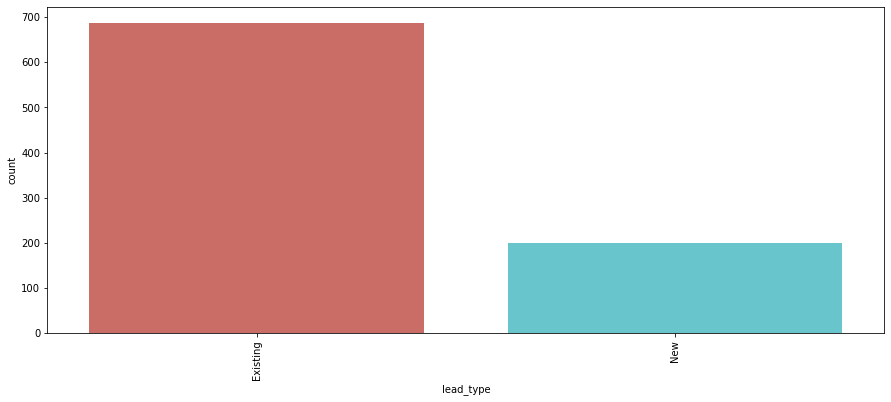

In [43]:
plt.figure(figsize=(15,6))
sns.countplot('lead_type', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()


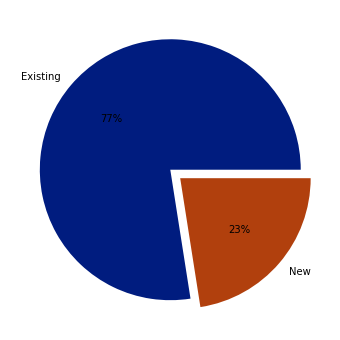

In [47]:
plt.figure(figsize=(15,6))
palette_color = sns.color_palette('dark')
explode = [0, 0.1]
plt.pie(data['lead_type'].value_counts(), labels= ['Existing', 'New'],
colors=palette_color, explode=explode,
autopct='%.0f%%')
plt.show()

### Count of Process feature categories

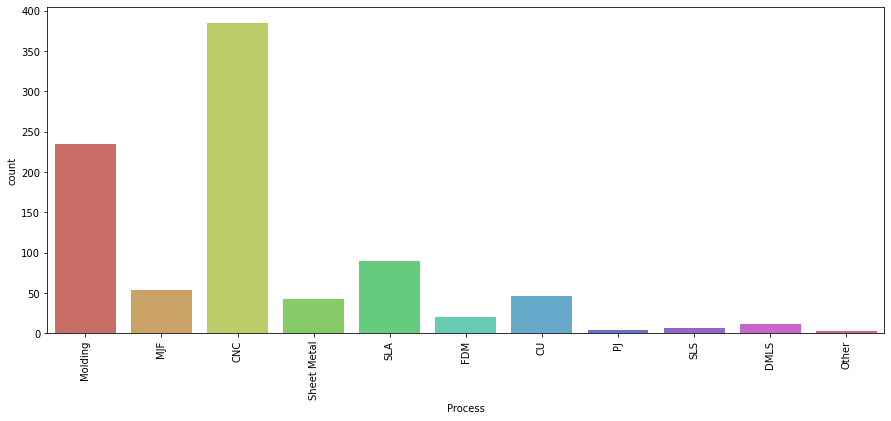

In [48]:
plt.figure(figsize=(15,6))
sns.countplot('Process',data = data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

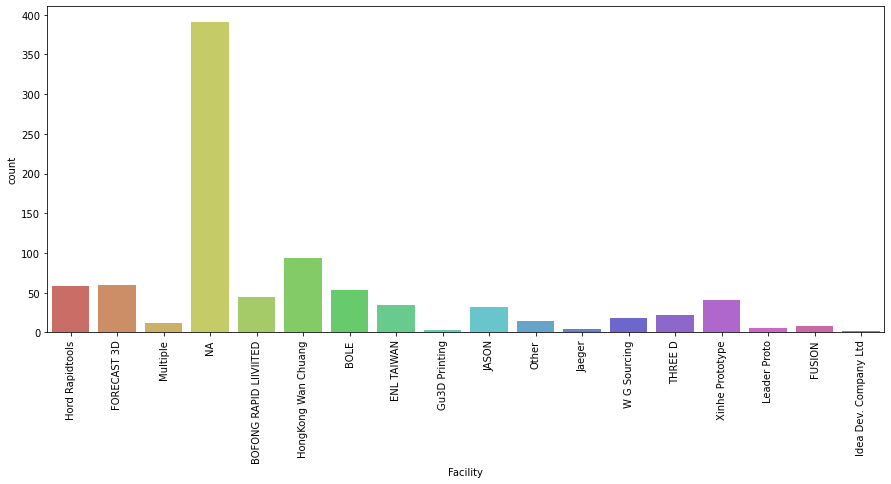

In [49]:
plt.figure(figsize=(15,6))
sns.countplot('Facility',data = data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

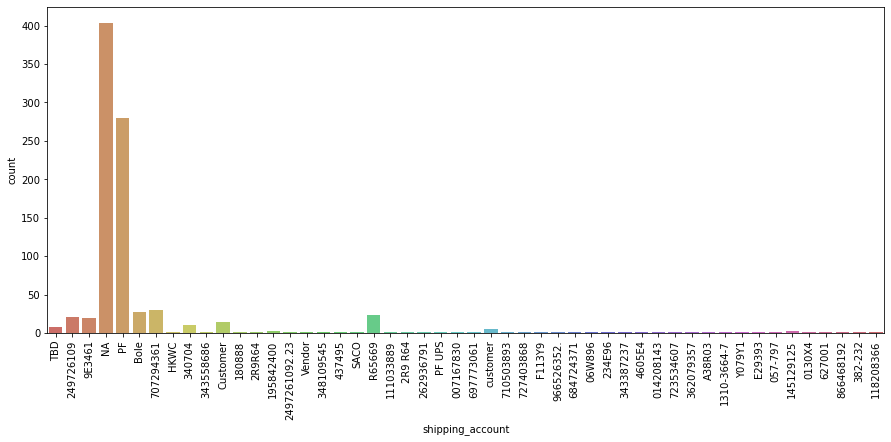

In [50]:
plt.figure(figsize=(15,6))
sns.countplot('shipping_account',data = data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [53]:
data.sales_manager.unique()

array(['Justin Howard', 'Matt Wendel'], dtype=object)

### Sales manager with lead type

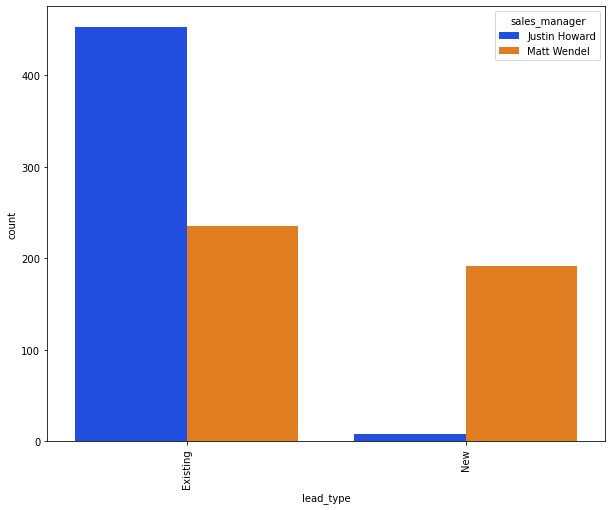

In [56]:
plt.figure(figsize=(10,8))
sns.countplot("lead_type", data=data, hue = 'sales_manager' ,
palette="bright")
plt.xticks(rotation = 90)
plt.show()

In [69]:
created_dataframe = data[["total_project_cost","created_month",'gp_percent','Amount','Process','lead_type']]

In [70]:
created_dataframe.head()

,total_project_cost,created_month,gp_percent,Amount,Process,lead_type
0,119647.5,9,36.63,188812.5,Molding,Existing
1,50.0,1,0.00,0.0,MJF,Existing
2,17330.0,12,31.09,25150.0,Molding,Existing
3,1300.0,1,35.00,2000.0,CNC,Existing
4,2100.0,12,30.00,3000.0,CNC,Existing


In [80]:
data_created_less_six=created_dataframe[created_dataframe["created_month"] <= 6]

In [84]:
data_created_less_six.head()

,total_project_cost,created_month,gp_percent,Amount,Process,lead_type
1,50.00,1,0.00,0.0,MJF,Existing
3,1300.00,1,35.00,2000.0,CNC,Existing
9,504.04,1,34.62,650.0,Sheet Metal,Existing
10,1252.54,1,51.59,1450.0,Molding,Existing
11,1235.26,1,38.51,1880.0,CNC,Existing


### Created_date upto june and the corresponding count of lead type

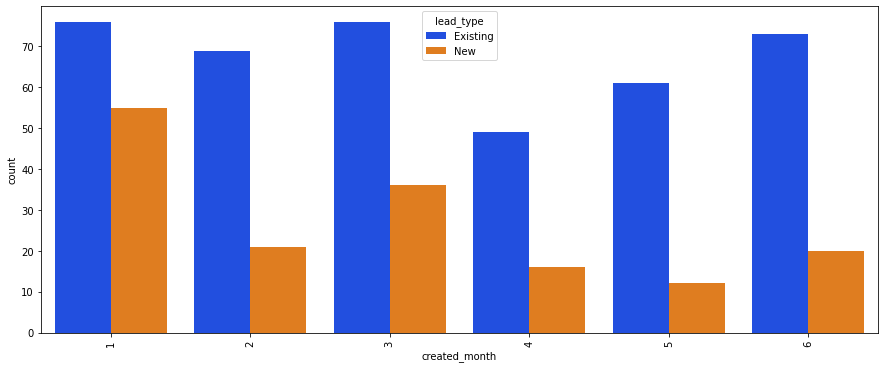

In [82]:
plt.figure(figsize=(15,6))
sns.countplot('created_month', data = data_created_less_six,
hue = 'lead_type' , palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

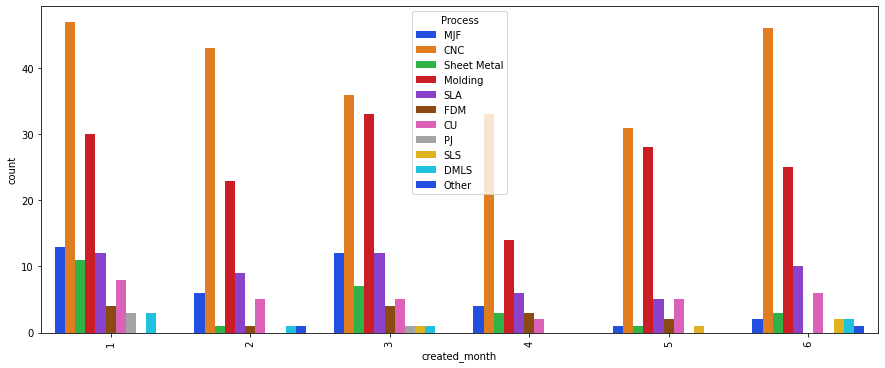

In [83]:
plt.figure(figsize=(15,6))
sns.countplot('created_month', data = data_created_less_six,
hue = 'Process' , palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

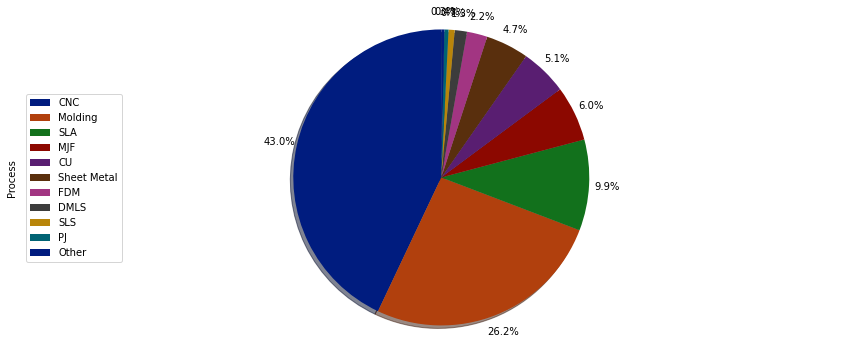

### Distribution plots of gp_Percent, Amount ,Total_project cost

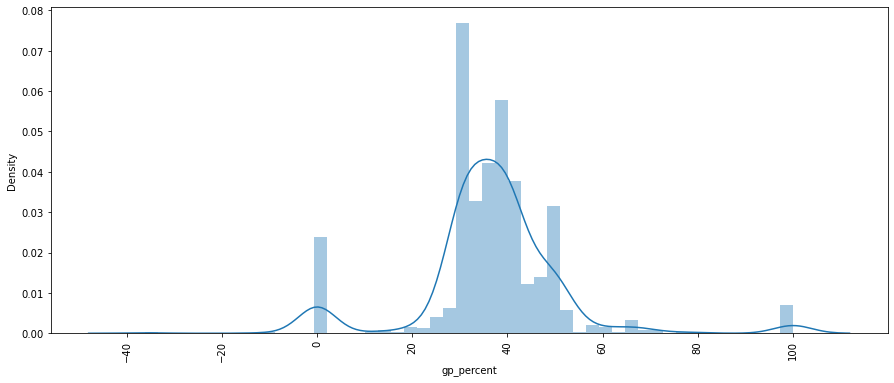

In [86]:
plt.figure(figsize=(15,6))
sns.distplot(data["gp_percent"])
plt.xticks(rotation=90)
plt.show()

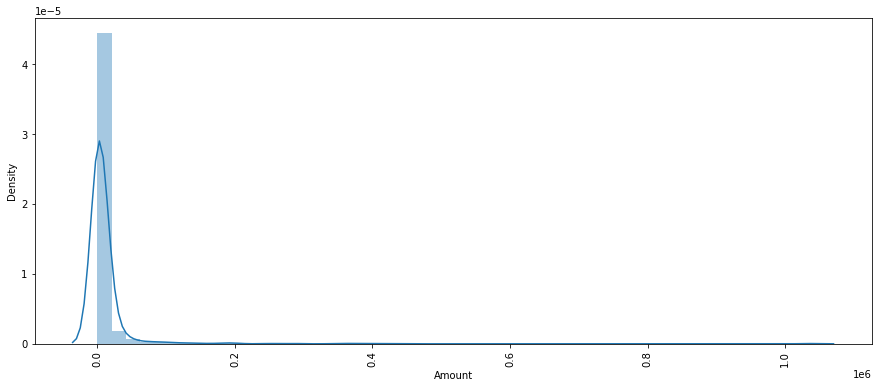

In [87]:
plt.figure(figsize=(15,6))
sns.distplot(data["Amount"])
plt.xticks(rotation=90)
plt.show()

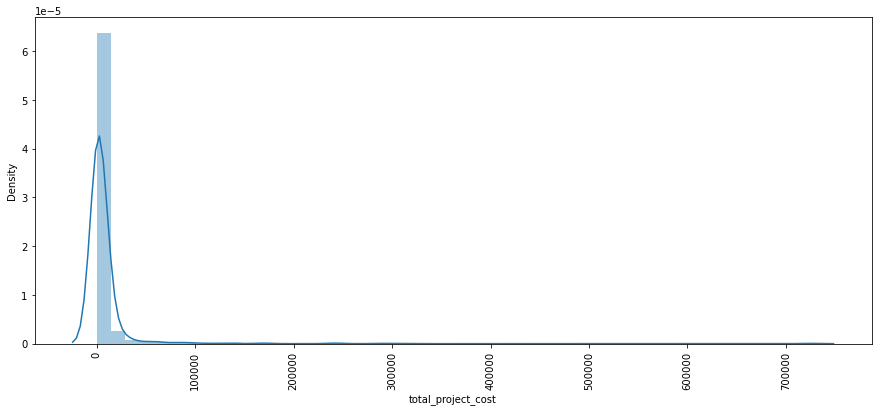

In [88]:
plt.figure(figsize=(15,6))
sns.distplot(data["total_project_cost"])
plt.xticks(rotation=90)
plt.show()

# Large number of creation happened in which month?

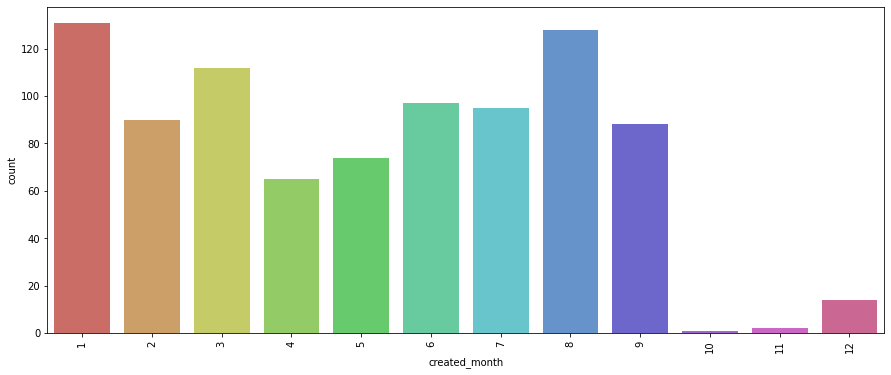

In [89]:
plt.figure(figsize=(15,6))
sns.countplot('created_month',data = data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## January month have large number of creation followed by august


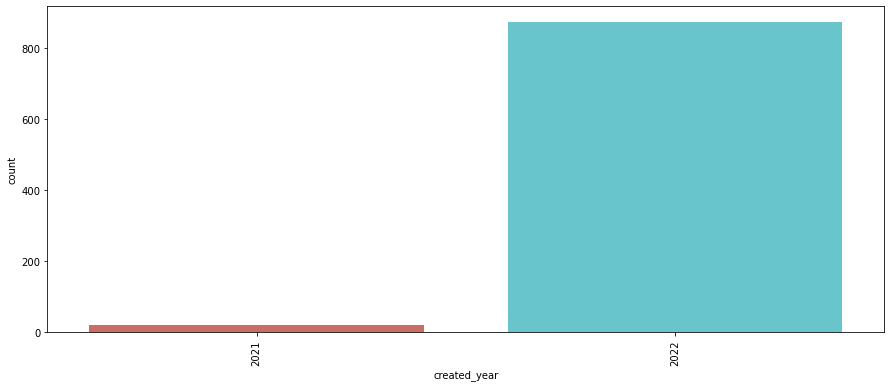

In [90]:
plt.figure(figsize=(15,6))
sns.countplot('created_year',data = data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## Large number closing happened in which moth?

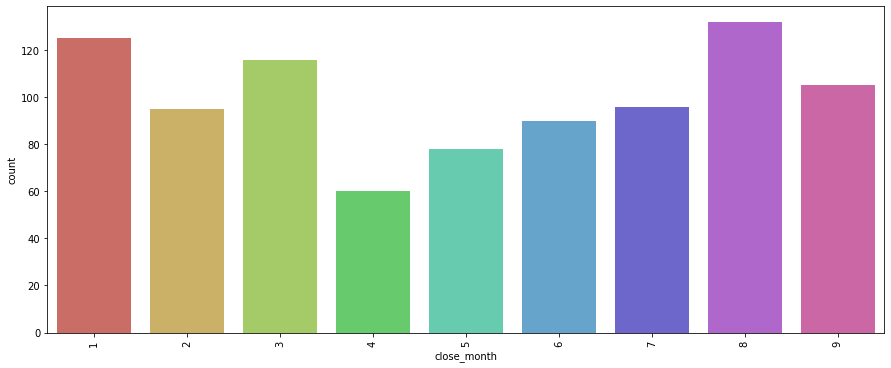

In [91]:
plt.figure(figsize=(15,6))
sns.countplot('close_month',data = data,palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

## August month having large number of closing happened

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 0 to 896
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   created_date        897 non-null    datetime64[ns]
 1   close_date          897 non-null    datetime64[ns]
 2   Multiple            897 non-null    float64       
 3   lead_type           888 non-null    object        
 4   sales_manager       897 non-null    object        
 5   account_name        897 non-null    object        
 6   opportunity_name    897 non-null    object        
 7   Process             896 non-null    object        
 8   Amount              897 non-null    float64       
 9   shipping_account    897 non-null    object        
 10  invoice_total       897 non-null    float64       
 11  customer_po         897 non-null    object        
 12  Facility            897 non-null    object        
 13  total_project_cost  897 non-null    float64       

In [108]:
data.groupby(['created_month']).sum().astype('int')

,Multiple,Amount,invoice_total,total_project_cost,gp_percent,created_year,created_day,close_year,close_month,close_day
created_month,,,,,,,,,,
1,0,1220578,1229719,825520,4609,264882,2260,264882,157,2098
2,1,725036,747654,503884,2882,181979,1428,181980,196,1451
3,0,855959,880424,543641,4273,226464,2013,226464,351,2074
4,0,438249,451891,243413,2630,131429,1065,131430,280,981
5,3,2189547,2207382,1465005,2836,149627,1125,149628,382,1079
6,1,1150394,1166016,779694,3505,196134,1555,196134,603,1484
7,2,710305,722952,445890,3610,192089,1673,192090,676,1552
8,2,1164401,1177204,727209,4725,258816,2004,258816,1041,1937
9,1,1122581,1123758,706642,3288,177935,1226,177936,784,1284


In [110]:
created_monthly_sum = data.groupby('created_month').sum().astype('int')

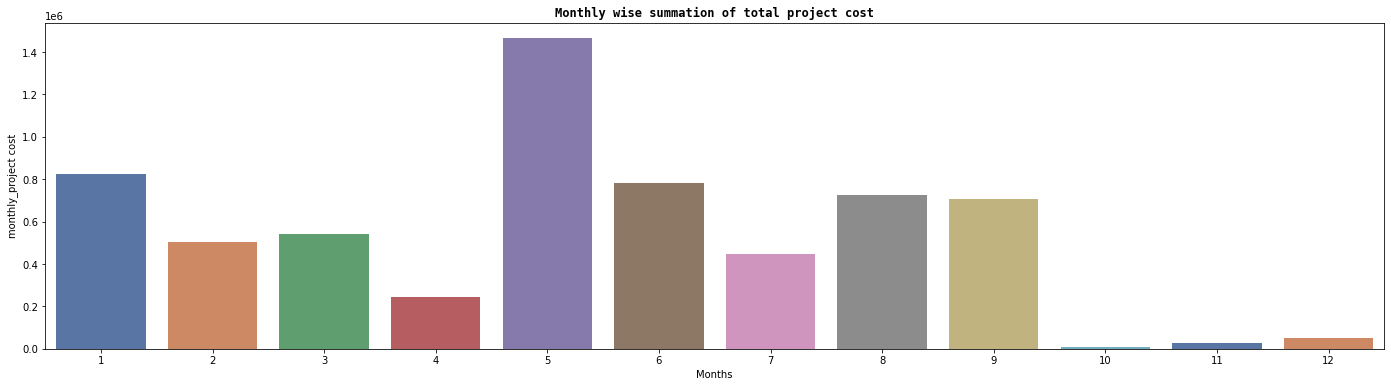

In [115]:
plt.figure(figsize=(24, 6)) 
sns.barplot(x=created_monthly_sum.index,y=created_monthly_sum['total_project_cost'],data=created_monthly_sum, palette='deep')
plt.title('Monthly wise summation of total project cost',fontname='monospace', weight='bold')
plt.xlabel('Months')
plt.ylabel('monthly_project cost');

May month having highest total project cost followed by january